# Agora Forum

In [27]:
from bs4 import BeautifulSoup as bs
import os
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import plotly.express as px
import descartes
import re
from ast import literal_eval as make_tuple
from ForumParsingTools import *


PATH_DF = '../saved_gen_df/forumDF_full_df.csv'

In [2]:
with open('../data/agora_forum_days.out') as f:
    dates = f.readlines()

def cut(s):
    return s[:-1]
cut_v = np.vectorize(cut)

dates = cut_v(dates)

In [3]:
def fixDate(r):
    
    return str(r).replace("Today", '')


In [4]:
forumDF = pd.read_csv(PATH_DF)
forumDF = forumDF.drop(columns=['Unnamed: 0'])
#forumDF['lastPost'] = forumDF['lastPost'].apply(fixDate)
#forumDF['lastPost'] = forumDF['lastPost'].apply(pd.to_datetime)
forumDF['date'] = forumDF['date'].apply(pd.to_datetime)
forumDF['title'] = forumDF['title'].astype(str)
forumDF

title     author  \
0        Free Agora Referral Link!!! Get you Vendor or ...     TheADC   
1        O0O0O0O0O0O0o ♣ ♦ [! ΛGOЯA PHISHING LINK !] ♦ ...  m¡lna2031   
2        O0O0O0O0O0O0o ♣ ♦ [! ΛGOЯA PHISHING LINK !] ♦ ...  m¡lna2031   
3        Sign up for Agora for free now http://agorahoo...     TheADC   
4        Free referal link- sign up now: http://agoraho...     TheADC   
...                                                    ...        ...   
1508594  ______________________________________________...        NaN   
1508595  ______________________________________________...        NaN   
1508596  ______________________________________________...        NaN   
1508597  ______________________________________________...        NaN   
1508598  ______________________________________________...        NaN   

         nReplies  nViews                    lastPost       date  \
0               0     234  June 23, 2014, 09:43:51 PM 2015-04-25   
1               1     294  June 23, 2014, 07:53:55 PM 2015-04-25   
2               0     275  June 23, 2014, 07:52:16 PM 2015-04-25   
3               8     373  June 23, 2014, 05:44:42 PM 2015-04-25   
4               9     340  June 23, 2014, 05:44:35 PM 2015-04-25   
...           ...     ...                         ...        ...   
1508594         0     164  June 30, 2014, 06:03:01 PM 2015-03-07   
1508595         0     171  June 30, 2014, 06:02:49 PM 2015-03-07   
1508596         0     139  June 30, 2014, 06:02:01 PM 2015-03-07   
1508597         0     173  June 30, 2014, 04:32:08 AM 2015-03-07   
1508598         0     227  June 30, 2014, 04:31:33 AM 2015-03-07   

                                          board  
0        ('General Category', 'Referral Links')  
1        ('General Category', 'Referral Links')  
2        ('General Category', 'Referral Links')  
3        ('General Category', 'Referral Links')  
4        ('General Category', 'Referral Links')  
...                                         ...  
1508594  ('General Category', 'Referral Links')  
1508595  ('General Category', 'Referral Links')  
1508596  ('General Category', 'Referral Links')  
1508597  ('General Category', 'Referral Links')  
1508598  ('General Category', 'Referral Links')  

[1508599 rows x 7 columns]

In [5]:
forum_day_df = []

for date in dates:
    forum_day_df.append(pd.read_csv('temp/forumDF'+date+".csv").set_index('title'))



In [6]:
indices = []
for i in range(len(forum_day_df)-1):
    indices.append(pd.Index(forum_day_df[i].index).intersection(forum_day_df[i+1].index))
    
for i in range(len(forum_day_df)-1):
    forum_day_df[i+1] = forum_day_df[i+1].drop(indices[i])

In [7]:
forum_day_df[0] = forum_day_df[0].reset_index().set_index('Unnamed: 0')
for i in range(len(forum_day_df)-1):
    forum_day_df[0] = forum_day_df[0].append(forum_day_df[i+1].reset_index().set_index('Unnamed: 0'))

In [8]:
forum_day_df[0].to_csv('../saved_gen_df/forum_titles_removed.csv')

In [9]:
filtered_df = pd.read_csv('../saved_gen_df/forum_titles_removed.csv')
filtered_df = filtered_df.drop(columns='Unnamed: 0')


In [10]:
def rmSmallWords(s):
    return re.sub(r'\b\w{1,3}\b', '', str(s))

def rmStopWords(xs):
    return [word for word in xs if word not in stopwords.words('english')]

In [172]:
filtered_df

date                                       board  \
0       2014-01-02  ('General Category', 'General Discussion')   
1       2014-01-02  ('General Category', 'General Discussion')   
2       2014-01-02  ('General Category', 'General Discussion')   
3       2014-01-02  ('General Category', 'General Discussion')   
4       2014-01-02  ('General Category', 'General Discussion')   
...            ...                                         ...   
505710  2015-07-06      ('General Category', 'Product Offers')   
505711  2015-07-06      ('General Category', 'Product Offers')   
505712  2015-07-06      ('General Category', 'Product Offers')   
505713  2015-07-06      ('General Category', 'Product Offers')   
505714  2015-07-06      ('General Category', 'Product Offers')   

                 author  nReplies  nViews                        lastPost  \
0              Scarface         8     106  December 23, 2013, 07:08:51 am   
1             Manlyness         1      31  December 23, 2013, 04:35:33 am   
2               maligan         2      49  December 23, 2013, 04:23:34 am   
3          Mangling2012         0      17  December 23, 2013, 04:03:37 am   
4               stannis         3      89  December 23, 2013, 02:51:52 am   
...                 ...       ...     ...                             ...   
505710  Lucid Gentleman         2     158     April 04, 2015, 10:57:03 AM   
505711          Dr-Lude         2     177     April 04, 2015, 07:06:27 AM   
505712        SouthPole         0     141     April 03, 2015, 09:03:48 AM   
505713  EmeraldTriangle         3     205     April 03, 2015, 06:18:32 AM   
505714  EmeraldTriangle         1     154     April 03, 2015, 06:17:22 AM   

                                              clean_title  \
0                                         become  vendor    
1                                           buyer account   
2                                               sign        
3                                   hello hello  good       
4                                     marketplace invite    
...                                                   ...   
505710  bulk orders worldwide  cocaine  heroin    changa    
505711                           only mandrax     ludes     
505712  special offers   free bonus tabs  reviews   re...   
505713                gummy orange wedges   super strong    
505714               game changer       strong  discrete    

                                                   tokens  \
0                                         [becom, vendor]   
1                                        [buyer, account]   
2                                                  [sign]   
3                                    [hello, hello, good]   
4                                     [marketplac, invit]   
...                                                   ...   
505710    [bulk, order, worldwid, cocain, heroin, changa]   
505711                              [onli, mandrax, lude]   
505712  [special, offer, free, bonu, tab, review, refe...   
505713                [gummi, orang, wedg, super, strong]   
505714                   [game, changer, strong, discret]   

                                          tokens_filtered  
0                                         [becom, vendor]  
1                                        [buyer, account]  
2                                                  [sign]  
3                                    [hello, hello, good]  
4                                     [marketplac, invit]  
...                                                   ...  
505710    [bulk, order, worldwid, cocain, heroin, changa]  
505711                              [onli, mandrax, lude]  
505712  [special, offer, free, bonu, tab, review, refe...  
505713                [gummi, orang, wedg, super, strong]  
505714                   [game, changer, strong, discret]  

[505715 rows x 9 columns]

In [12]:
filtered_df['title'] = filtered_df['title'].astype(str)
filtered_df['clean_title'] = filtered_df['title'].str.replace("[^a-zA-Z#]", " ")
filtered_df['clean_title'] = filtered_df['clean_title'].apply(rmSmallWords)
filtered_df['clean_title'] = filtered_df['clean_title'].str.lower()
filtered_df['board'] = filtered_df['board'].apply(make_tuple)
filtered_df = filtered_df.drop(columns='title')

In [61]:
test = filtered_df.groupby(by=['date','board']).count().reset_index()

In [66]:
test.set_index(['date', 'board'], inplace=True)

In [64]:
test['board'] = test['board'].astype(str)
test['board'] = test['board'].apply(make_tuple)


In [78]:
nPages_df = pd.read_csv('../saved_gen_df/nPages_forum_df.csv')
nPages_df['board'] = nPages_df['board'].astype(str)
nPages_df['board'] = nPages_df['board'].apply(make_tuple)

In [79]:
nPages_df.set_index(['date', 'board'], inplace=True)

In [85]:
joint_df = nPages_df.join(test).reset_index()

In [88]:
joint_df = joint_df.fillna(1)
joint_df

date                                   board  index  nPages  \
0     2014-01-02  (General Category, General Discussion)      0       3   
1     2014-01-02        (General Category, New features)      1       1   
2     2014-01-02                (General Category, Bugs)      2       1   
3     2014-01-02  (General Category, Product categories)      3       1   
4     2014-01-02          (Offtopic, Generic randomness)      4       1   
...          ...                                     ...    ...     ...   
2109  2015-07-06                  (Local forums, German)      3      14   
2110  2015-07-06          (Offtopic, Generic randomness)      4       8   
2111  2015-07-06                (Official section, News)      5       1   
2112  2015-07-06                (Official section, Info)      6       1   
2113  2015-07-06   (General Category, Vendor Discussion)      7      96   

      nTopics_est  author  nReplies  nViews  lastPost  clean_title  tokens  \
0             125   112.0     198.0   198.0     198.0        198.0   198.0   
1              25    16.0      31.0    31.0      31.0         31.0    31.0   
2              25    15.0      24.0    24.0      24.0         24.0    24.0   
3              25    12.0      29.0    29.0      29.0         29.0    29.0   
4              25     4.0       9.0     9.0       9.0          9.0     9.0   
...           ...     ...       ...     ...       ...          ...     ...   
2109          675   350.0     351.0   351.0     351.0        351.0   351.0   
2110          375   314.0     314.0   314.0     314.0        314.0   314.0   
2111           25     1.0       1.0     1.0       1.0          1.0     1.0   
2112           25     1.0       1.0     1.0       1.0          1.0     1.0   
2113         4775   781.0     810.0   810.0     810.0        810.0   810.0   

      tokens_filtered  
0               198.0  
1                31.0  
2                24.0  
3                29.0  
4                 9.0  
...               ...  
2109            351.0  
2110            314.0  
2111              1.0  
2112              1.0  
2113            810.0  

[2114 rows x 12 columns]

In [99]:
res =joint_df.drop(columns=['index', 'lastPost', 'nReplies','author','clean_title', 'tokens', 'tokens_filtered'])

In [106]:
res = res.rename(columns={'nViews':'nSample'})

In [108]:
res.to_csv('../saved_gen_df/nPages_nTopicest_nSample_perDayAndBoard.csv', index=None)

In [113]:
px.scatter(res, x="nTopics_est", y="nSample", animation_frame="date", animation_group="board",
           size='nPages', size_max=55, color="board", hover_name="board",
          range_x=[1, 30000], range_y=[1,30000], log_x=True, log_y=True)

In [13]:
import nltk
from nltk.corpus import stopwords

filtered_df['tokens'] = filtered_df['clean_title'].apply(lambda x: x.split()) # tokenizing
from nltk.stem.porter import *
stemmer = PorterStemmer()

filtered_df['tokens']  = filtered_df['tokens'].apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
filtered_df['tokens_filtered'] = filtered_df['tokens'].apply(rmStopWords)


In [152]:
filtered_df['board'] = filtered_df['board'].astype(str)

In [202]:
boards_bf = np.array(["('General Category', 'Vendor Discussion')",
       "('General Category', 'Newbie Section ')",
       "('General Category', 'Referral Links')",
       "('General Category', 'Security Discussion')"])

In [215]:
subdf_bef = filtered_df[(filtered_df['date'] >= '2014-07-05') & (filtered_df['date'] <= '2014-11-06')
                       & (filtered_df['board'].isin(boards_bf))]
subdf_af = filtered_df[(filtered_df['date'] >= '2014-11-07') & (filtered_df['date'] <= '2014-12-07')
                      & (filtered_df['board'].isin(boards_bf))]

In [225]:
filtered_df.groupby(by='clean_title').agg('author')

In [213]:
filtered_df[(filtered_df['date'] >= '2014-12-01') & (filtered_df['date'] <= '2014-12-31')
                      & (filtered_df['board'].isin(boards_bf))]

date                                      board  \
216555  2014-12-01     ('General Category', 'Referral Links')   
216556  2014-12-01     ('General Category', 'Referral Links')   
216557  2014-12-01     ('General Category', 'Referral Links')   
216558  2014-12-01     ('General Category', 'Referral Links')   
216559  2014-12-01     ('General Category', 'Referral Links')   
...            ...                                        ...   
300462  2014-12-30    ('General Category', 'Newbie Section ')   
300463  2014-12-30    ('General Category', 'Newbie Section ')   
300464  2014-12-30    ('General Category', 'Newbie Section ')   
300465  2014-12-30  ('General Category', 'Vendor Discussion')   
300466  2014-12-30  ('General Category', 'Vendor Discussion')   

                   author  nReplies  nViews                        lastPost  \
216555          dark silo         0      71      July 21, 2014, 04:07:16 PM   
216556          dark silo         0      62      July 21, 2014, 04:06:56 PM   
216557          dark silo         0      63      July 21, 2014, 04:06:41 PM   
216558       ReferralLink         0      78      July 21, 2014, 02:16:28 PM   
216559       ReferralLink         0      76      July 21, 2014, 02:14:27 PM   
...                   ...       ...     ...                             ...   
300462  thrillbilly351976         0       5  December 28, 2014, 03:01:56 AM   
300463   laflamablanca101         0      12  December 28, 2014, 02:57:31 AM   
300464      knucklechild5         0      19  December 28, 2014, 12:49:27 AM   
300465          magicman1         1     194     April 14, 2014, 03:32:54 PM   
300466      HydroBlowBack         0     117     April 14, 2014, 02:52:37 PM   

                                              clean_title  \
216555      referral link                   referral link   
216556      referral link                   referral link   
216557      referral link                   referral link   
216558                                      referral link   
216559                                agora referral link   
...                                                   ...   
300462  wife  multiple sclerosis  looking  right strai...   
300463                                      free weed       
300464                                            dummies   
300465                  real caliconnect   bluesky market   
300466                           vendor review  sambalam    

                                                   tokens  \
216555                       [referr, link, referr, link]   
216556                       [referr, link, referr, link]   
216557                       [referr, link, referr, link]   
216558                                     [referr, link]   
216559                              [agora, referr, link]   
...                                                   ...   
300462  [wife, multipl, sclerosi, look, right, strain,...   
300463                                       [free, weed]   
300464                                            [dummi]   
300465               [real, caliconnect, blueski, market]   
300466                         [vendor, review, sambalam]   

                                          tokens_filtered  
216555                       [referr, link, referr, link]  
216556                       [referr, link, referr, link]  
216557                       [referr, link, referr, link]  
216558                                     [referr, link]  
216559                              [agora, referr, link]  
...                                                   ...  
300462  [wife, multipl, sclerosi, look, right, strain,...  
300463                                       [free, weed]  
300464                                            [dummi]  
300465               [real, caliconnect, blueski, market]  
300466                         [vendor, review, sambalam]  

[38763 rows x 9 columns]

In [214]:
filtered_df[(filtered_df['date'] >= '2014-07-05') & (filtered_df['date'] <= '2014-11-06')
                       & (filtered_df['board'].isin(boards_bf))]

date                                      board       author  \
48679   2014-07-05  ('General Category', 'Vendor Discussion')          NaN   
48680   2014-07-05  ('General Category', 'Vendor Discussion')          NaN   
48681   2014-07-05  ('General Category', 'Vendor Discussion')          NaN   
48682   2014-07-05  ('General Category', 'Vendor Discussion')          NaN   
48683   2014-07-05  ('General Category', 'Vendor Discussion')          NaN   
...            ...                                        ...          ...   
161494  2014-11-06     ('General Category', 'Referral Links')       newsig   
161495  2014-11-06     ('General Category', 'Referral Links')       newsig   
161496  2014-11-06     ('General Category', 'Referral Links')       newsig   
161497  2014-11-06     ('General Category', 'Referral Links')     joovialo   
161498  2014-11-06     ('General Category', 'Referral Links')  Praystation   

        nReplies  nViews              lastPost  \
48679          0       7  Today at 05:46:10 am   
48680          3     211  Today at 04:50:33 am   
48681          4      75  Today at 02:16:23 am   
48682          6      86  Today at 02:03:29 am   
48683          7     188  Today at 01:45:35 am   
...          ...     ...                   ...   
161494         0       3  Today at 10:39:39 AM   
161495         0       0  Today at 10:37:07 AM   
161496        44    1116  Today at 10:32:31 AM   
161497     15833    5115  Today at 01:48:30 AM   
161498         0      10  Today at 12:58:40 AM   

                                              clean_title  \
48679               chipz concentrates                ...   
48680                           vendor review  theicelady   
48681          best shipping priced intenational ethylone   
48682                                    real caliconnect   
48683                           hasn  tried theoutlets      
...                                                   ...   
161494   verified   agora marketplace  onion invite   ...   
161495  invite invitation link   agora market    user ...   
161496  fresh agora  user signup referral link  buyers...   
161497    invite link  buyers   vendors   agorahooaway...   
161498                                        sign  here    

                                                   tokens  \
48679                         [chipz, concentr, right, #]   
48680                        [vendor, review, theiceladi]   
48681                 [best, ship, price, inten, ethylon]   
48682                                 [real, caliconnect]   
48683                              [hasn, tri, theoutlet]   
...                                                   ...   
161494  [verifi, agora, marketplac, onion, invit, user...   
161495  [invit, invit, link, agora, market, user, regi...   
161496  [fresh, agora, user, signup, referr, link, buy...   
161497  [invit, link, buyer, vendor, agorahooawayyfo, ...   
161498                                       [sign, here]   

                                          tokens_filtered  
48679                         [chipz, concentr, right, #]  
48680                        [vendor, review, theiceladi]  
48681                 [best, ship, price, inten, ethylon]  
48682                                 [real, caliconnect]  
48683                                    [tri, theoutlet]  
...                                                   ...  
161494  [verifi, agora, marketplac, onion, invit, user...  
161495  [invit, invit, link, agora, market, user, regi...  
161496  [fresh, agora, user, signup, referr, link, buy...  
161497  [invit, link, buyer, vendor, agorahooawayyfo, ...  
161498                                             [sign]  

[40538 rows x 9 columns]

In [15]:
def word_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        hashtags.append(i)

    return hashtags

In [216]:
all_words_bf = sum(word_extract(subdf_bef['tokens_filtered']), [])
all_words_af = sum(word_extract(subdf_af['tokens_filtered']), [])

              Hashtag  Count
133             agora   4642
141              free   4273
5              review   3502
26             offici   3403
169             activ   2518
7                best   2468
90            bitcoin   2165
147            market   2139
154            regist   2109
23             thread   1966
172           darknet   1605
153             onion   1550
152   agorahooawayyfo   1458
151              http   1443
2438             juli   1038
3487       mastercard   1019
166        xixspxxguu    998
43              anyon    995
57               help    991
134           account    866
73               need    865
212             order    831


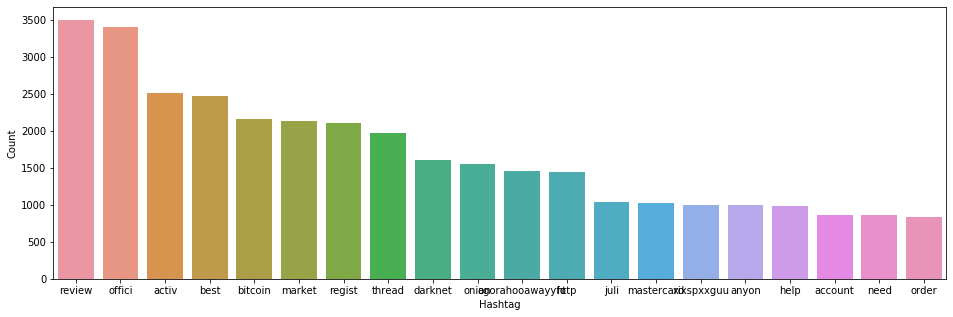

In [221]:
a = nltk.FreqDist(all_words_bf)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 25) 
print(d[3:])
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d[5:], x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

     Hashtag  Count
9      agora   5094
215   review   3377
125  bitcoin   2979
7       free   2830
225   offici   2548
2     thread   1836
8      activ   1547
18   registr   1473
4       best   1262
14      help   1142
282   regist   1138
39     anyon   1119
79      need   1053
63     order   1030
81       thi    908
48   account    875
261     post    842
82      spam    831
178     mdma    831
5     market    820
167     scam    809
163  scammer    806


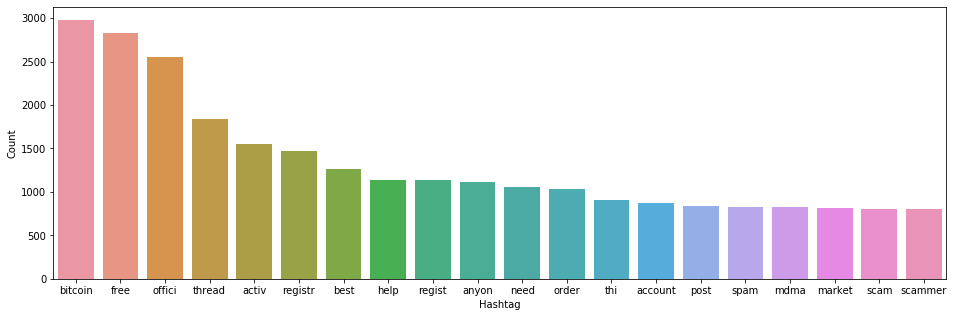

In [222]:
a = nltk.FreqDist(all_words_af)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 25)
print(d[3:])
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d[5:], x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

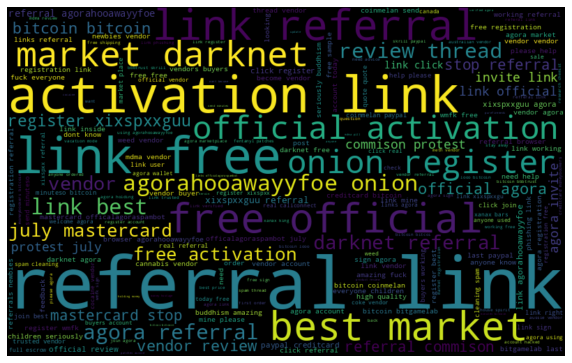

In [219]:
all_words = ' '.join([text for text in subdf_bef['clean_title']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

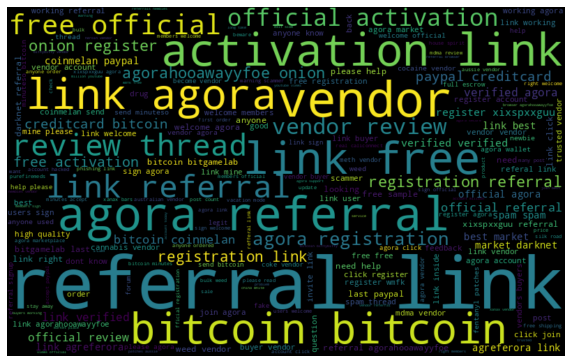

In [220]:
all_wordss = ' '.join([text for text in subdf_af['clean_title']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_wordss)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
filtered_df.to_csv('../saved_gen_df/forum_filtered_df.csv', index=None)

In [ ]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_af)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
'''
for date in dates:
    directory="data/agora-forums/"+date+"/index.php/"
    createDfFromForum(directory,date).to_csv("scripts/temp/forumDF"+date+".csv")
'''

#### UNREAD FILES

data/agora-forums/2014-03-19/index.php/board,9.0.html
data/agora-forums/2014-04-05/index.php/board,9.0.html
data/agora-forums/2014-04-16/index.php/board,9.0.html
data/agora-forums/2014-04-24/index.php/board,9.0.html
data/agora-forums/2014-04-27/index.php/board,9.0.html
data/agora-forums/2014-05-14/index.php/board,9.0.html
data/agora-forums/2014-05-24/index.php/board,9.0.html
data/agora-forums/2014-06-01/index.php/board,9.0.html
data/agora-forums/2014-07-17/index.php/board,9.0.html
data/agora-forums/2014-07-25/index.php/board,9.0.html
data/agora-forums/2014-07-29/index.php/board,9.0.html
data/agora-forums/2014-08-02/index.php/board,9.0.html
data/agora-forums/2014-08-11/index.php/board,9.0.html
data/agora-forums/2014-08-20/index.php/board,9.0.html
data/agora-forums/2014-08-25/index.php/board,9.0.html
data/agora-forums/2014-08-28/index.php/board,9.0.html
data/agora-forums/2014-09-02/index.php/board,9.0.html
data/agora-forums/2014-09-14/index.php/board,9.0.html
data/agora-forums/2014-10-04/index.php/board,9.0.html
data/agora-forums/2014-10-20/index.php/board,9.0.html
data/agora-forums/2014-10-23/index.php/board,9.0.html
data/agora-forums/2014-10-29/index.php/board,9.0.html
data/agora-forums/2014-11-07/index.php/board,9.0.html
data/agora-forums/2014-11-08/index.php/board,9.0.html
data/agora-forums/2014-11-10/index.php/board,9.0.html
data/agora-forums/2014-11-13/index.php/board,9.0.html
data/agora-forums/2014-11-14/index.php/board,9.0.html
data/agora-forums/2014-11-15/index.php/board,9.0.html
data/agora-forums/2014-11-16/index.php/board,9.0.html
data/agora-forums/2014-11-18/index.php/board,9.0.html
data/agora-forums/2014-11-29/index.php/board,9.0.html
data/agora-forums/2014-12-01/index.php/board,9.0.html
data/agora-forums/2014-12-02/index.php/board,9.0.html
data/agora-forums/2014-12-05/index.php/board,9.0.html
data/agora-forums/2014-12-06/index.php/board,9.0.html
data/agora-forums/2014-12-09/index.php/board,9.0.html
data/agora-forums/2014-12-12/index.php/board,9.0.html
data/agora-forums/2014-12-15/index.php/board,9.0.html
data/agora-forums/2014-12-17/index.php/board,9.0.html
data/agora-forums/2014-12-20/index.php/board,9.0.html
data/agora-forums/2014-12-21/index.php/board,9.0.html
data/agora-forums/2014-12-24/index.php/board,9.0.html
data/agora-forums/2014-12-26/index.php/board,9.0.html
data/agora-forums/2014-12-28/index.php/board,9.0.html
data/agora-forums/2014-12-30/index.php/board,9.0.html
data/agora-forums/2014-12-21/index.php/board,9.0.html
data/agora-forums/2014-12-24/index.php/board,9.0.html
data/agora-forums/2014-12-26/index.php/board,9.0.html
data/agora-forums/2014-12-28/index.php/board,9.0.html
data/agora-forums/2014-12-30/index.php/board,9.0.html
data/agora-forums/2015-01-04/index.php/board,8.2040.html
data/agora-forums/2015-01-04/index.php/board,9.0.html
data/agora-forums/2015-01-06/index.php/board,9.0.html
data/agora-forums/2015-01-14/index.php/board,9.0.html
data/agora-forums/2015-01-24/index.php/board,9.0.html
data/agora-forums/2015-01-29/index.php/board,9.0.html
data/agora-forums/2015-02-09/index.php/board,4.300.html
data/agora-forums/2015-02-09/index.php/board,4.300.html
data/agora-forums/2015-02-17/index.php/board,9.0.html

In [ ]:
subdf = forumDF[['nReplies', 'nViews', 'date', 'title']].groupby(by=['date'])

    manque pleins de pages mais au moins on a toujours les plus récente
    utiliser les nb de page pour estimer le nb de topics par board et utiliser juste les titres et tout
    pour analyse language

In [ ]:
info = forumDF[['date', 'board']].groupby(by='date').describe()
info

NameError: name 'info' is not defined

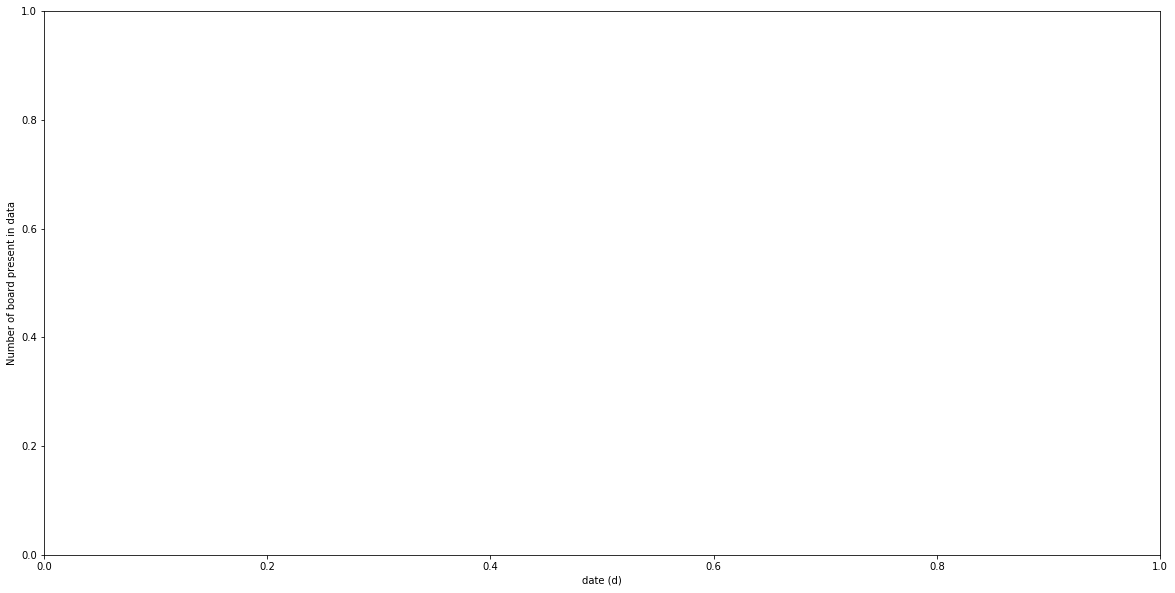

In [114]:
fig, ax1 = plt.subplots( figsize=(20,10))

ax1.set_xlabel('date (d)')
ax1.set_ylabel('Number of board present in data')
ax1.plot(info.index, info.board['unique'])
ax1.tick_params(axis='y')
plt.show()